In [204]:
from __future__ import print_function
import pandas as pd
import pandas_datareader.data as web
import io
import numpy as np
import requests
import time
import datetime
import math

# Facebook Prophet Dependencies
from fbprophet import Prophet

from sklearn.metrics import mean_absolute_error, mean_squared_error


# LSTM Dependencies
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential 
import lstm, time 

import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from collections import OrderedDict

import preprocessing

In [215]:
symbols = np.array(['googl','aapl','fit','snap','fb','ibm','dwdp','fls'])
stock_data = {}
symbol = 'GOOGL' #symbols[0]
data = {}

In [217]:
stock_data[symbol] = preprocessing.main.__func__(symbol)

In [218]:
print(stock_data[symbol].shape)
data[symbol] = stock_data[symbol].iloc[:,3].to_frame(name=None)
print(type(data[symbol]))

(2891, 16)
<class 'pandas.core.frame.DataFrame'>


In [219]:
stock_data[symbol].iloc[0]

Open            3.137888e+02
High            3.150701e+02
Low             3.124324e+02
Close           3.136887e+02
Adj Close       3.136887e+02
Volume          3.908400e+06
prev_diff       0.000000e+00
50d             3.136887e+02
10d_vol         0.000000e+00
sm_open         3.137888e+02
sm_high         3.150701e+02
sm_low          3.124324e+02
sm_close        3.136887e+02
sm_adj_close    3.136887e+02
sm_volume       3.908400e+06
sm_prev_diff    0.000000e+00
Name: 2010-01-04 00:00:00, dtype: float64

In [58]:
print(data[symbol].shape)
print(data[symbol].head)

(2890, 1)
<bound method NDFrame.head of                   Open
2010-01-04   30.490000
2010-01-05   30.657143
2010-01-06   30.625713
2010-01-07   30.250000
2010-01-08   30.042856
2010-01-09   30.161904
2010-01-10   30.280952
2010-01-11   30.400000
2010-01-12   29.884285
2010-01-13   29.695715
2010-01-14   30.015715
2010-01-15   30.132856
2010-01-16   30.039999
2010-01-17   29.947142
2010-01-18   29.854286
2010-01-19   29.761429
2010-01-20   30.701429
2010-01-21   30.297142
2010-01-22   29.540001
2010-01-23   29.336667
2010-01-24   29.133334
2010-01-25   28.930000
2010-01-26   29.421429
2010-01-27   29.549999
2010-01-28   29.275715
2010-01-29   28.725714
2010-01-30   28.310952
2010-01-31   27.896190
2010-02-01   27.481428
2010-02-02   27.987143
...                ...
2017-11-03  174.000000
2017-11-04  173.456665
2017-11-05  172.913330
2017-11-06  172.369995
2017-11-07  173.910004
2017-11-08  174.660004
2017-11-09  175.110001
2017-11-10  175.110001
2017-11-11  174.573334
2017-11-12  174.0

In [59]:
# symbols = np.array(['aapl', 'ibm', 'googl'])

# data = {}
# for symbol in symbols:
#     data[symbol] = preprocessing.main.__func__(symbol)
#     time.sleep(2)

### Correlation between different Features in GOOGL Data

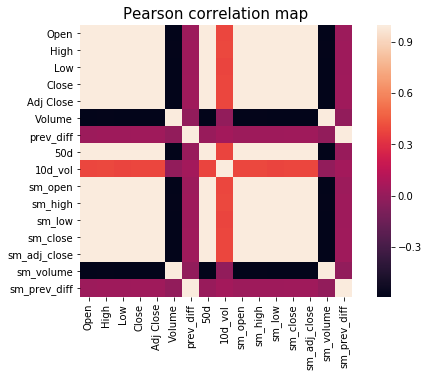

,Open,High,Low,Close,Adj Close,Volume,prev_diff,50d,10d_vol,sm_open,sm_high,sm_low,sm_close,sm_adj_close,sm_volume,sm_prev_diff
Open,1.000000,0.999891,0.999815,0.999714,0.999714,-0.587455,0.024095,0.995092,0.387869,1.000000,0.999891,0.999815,0.999714,0.999714,-0.587455,0.024095
High,0.999891,1.000000,0.999807,0.999848,0.999848,-0.585692,0.031199,0.995061,0.391922,0.999891,1.000000,0.999807,0.999848,0.999848,-0.585692,0.031199
Low,0.999815,0.999807,1.000000,0.999889,0.999889,-0.591479,0.033556,0.994713,0.383776,0.999815,0.999807,1.000000,0.999889,0.999889,-0.591479,0.033556
Close,0.999714,0.999848,0.999889,1.000000,1.000000,-0.589166,0.040120,0.994760,0.387611,0.999714,0.999848,0.999889,1.000000,1.000000,-0.589166,0.040120
Adj Close,0.999714,0.999848,0.999889,1.000000,1.000000,-0.589166,0.040120,0.994760,0.387611,0.999714,0.999848,0.999889,1.000000,1.000000,-0.589166,0.040120
Volume,-0.587455,-0.585692,-0.591479,-0.589166,-0.589166,1.000000,-0.009829,-0.593426,-0.013583,-0.587455,-0.585692,-0.591479,-0.589166,-0.589166,1.000000,-0.009829
prev_diff,0.024095,0.031199,0.033556,0.040120,0.040120,-0.009829,1.000000,0.015847,0.047775,0.024095,0.031199,0.033556,0.040120,0.040120,-0.009829,1.000000
50d,0.995092,0.995061,0.994713,0.994760,0.994760,-0.593426,0.015847,1.000000,0.377573,0.995092,0.995061,0.994713,0.994760,0.994760,-0.593426,0.015847
10d_vol,0.387869,0.391922,0.383776,0.387611,0.387611,-0.013583,0.047775,0.377573,1.000000,0.387869,0.391922,0.383776,0.387611,0.387611,-0.013583,0.047775
sm_open,1.000000,0.999891,0.999815,0.999714,0.999714,-0.587455,0.024095,0.995092,0.387869,1.000000,0.999891,0.999815,0.999714,0.999714,-0.587455,0.024095


In [220]:
# symbol = 'googl'
dates = [(data[symbol].index[i].now().date()).strftime('%Y-%m-%d') for i in range(data[symbol].shape[0])]

df = pd.DataFrame() 
df = stock_data[symbol]
df['Date'] = dates
# df['Open','High','Low','Close','Adj Close','Volume','prev_diff','50d','10d_vol','sm_open','sm_high','sm_low','sm_close','sm_adj_close','sm_volume','sm_prev_diff'] = columns
# class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

# df = df[df['Date']>'2017-05-01']
# for sym in symbols:
#     stock_name.append(currency)
#     temp_df = data[symbol]
#     df[sym] = temp_df[temp_df['Date']>'2017-05-01'].Close
    
# stock_name.append(symbol)
# temp_df = df[symbol]
# df[symbol] = temp_df[temp_df['Date']>'2017-05-01'].Close

# temp_df = df[stock_name]
corrmat = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Pearson correlation map", fontsize=15)
plt.show()
df.corr(method='pearson')

### Correlation Map Between Different Stocks

In [98]:
#correlation between different stocks
data_corr = pd.DataFrame()
for symbol in symbols:
    data_corr[symbol] = preprocessing.main.__func__(symbol)['Close']
    time.sleep(5)

In [106]:
data_corr['cvx'] = preprocessing.main.__func__('cvx')['Close']

In [108]:
data_corr['lha'] = preprocessing.main.__func__('lha')['Close']

In [110]:
data_corr['ual'] = preprocessing.main.__func__('ual')['Close']

In [117]:
data_corr['fb'] = preprocessing.main.__func__('fb')['Close']

In [115]:
data_corr['snap'] = preprocessing.main.__func__('snap')['Close']

In [128]:
data_corr['snp'] = preprocessing.main.__func__('snp')['Close']

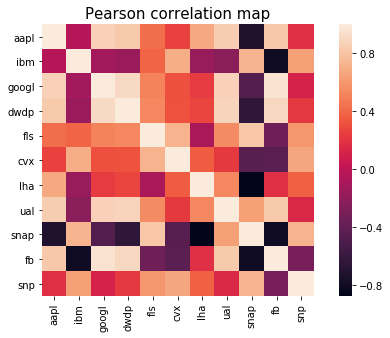

,aapl,ibm,googl,dwdp,fls,cvx,lha,ual,snap,fb,snp
aapl,1.000000,-0.038338,0.874944,0.832826,0.428479,0.266786,0.678615,0.847627,-0.719338,0.828571,0.186873
ibm,-0.038338,1.000000,-0.119750,-0.150655,0.389457,0.706626,-0.161568,-0.224607,0.733920,-0.807249,0.638402
googl,0.874944,-0.119750,1.000000,0.908161,0.512849,0.313781,0.231413,0.872484,-0.473982,0.953580,0.120764
dwdp,0.832826,-0.150655,0.908161,1.000000,0.531998,0.325297,0.267738,0.885639,-0.642392,0.903581,0.218669
fls,0.428479,0.389457,0.512849,0.531998,1.000000,0.724191,-0.082135,0.546075,0.819273,-0.340612,0.603346
cvx,0.266786,0.706626,0.313781,0.325297,0.724191,1.000000,0.362213,0.228304,-0.449238,-0.432383,0.666716
lha,0.678615,-0.161568,0.231413,0.267738,-0.082135,0.362213,1.000000,0.535838,-0.875075,0.181881,0.370862
ual,0.847627,-0.224607,0.872484,0.885639,0.546075,0.228304,0.535838,1.000000,0.637829,0.835865,0.148211
snap,-0.719338,0.733920,-0.473982,-0.642392,0.819273,-0.449238,-0.875075,0.637829,1.000000,-0.802414,0.723198
fb,0.828571,-0.807249,0.953580,0.903581,-0.340612,-0.432383,0.181881,0.835865,-0.802414,1.000000,-0.296741


In [129]:
corrmat_stocks = data_corr.corr(method='spearman')
fig, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(corrmat_stocks, vmax=1., square=True)
plt.title("Spearman correlation map between closing prices of different stocks", fontsize=12)
plt.show()
data_corr.corr(method='spearman')

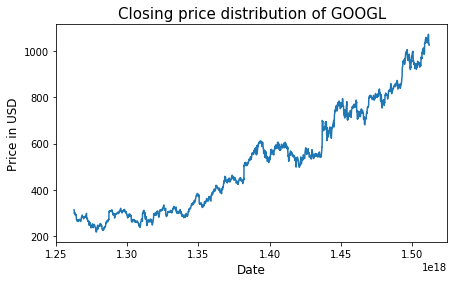

In [221]:
#Closing price visualization
for symbol in data:
#     plt.subplot(2, 2, 2)
#     plt.subplots(1, 2, figsize=(20, 4))
    fig, ax = plt.subplots(figsize=(7,4))
    plt.plot(data[symbol])
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    title_str = "Closing price distribution of " + symbol
    plt.title(title_str, fontsize=15)
    plt.show()
#     plt.plot(currency_time_series[ts])

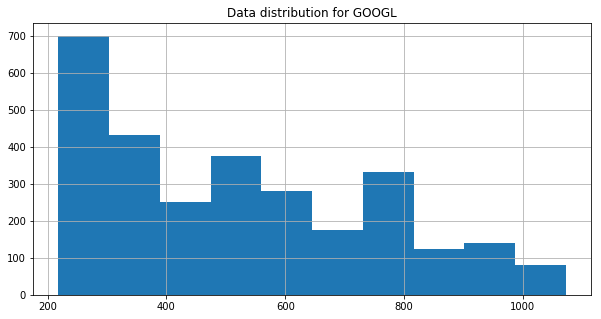

In [222]:
#Visualizing data distribution to check for Stationarity (aapl data used)
data[symbol].hist()
plt.title('Data distribution for ' + symbol)
plt.show()

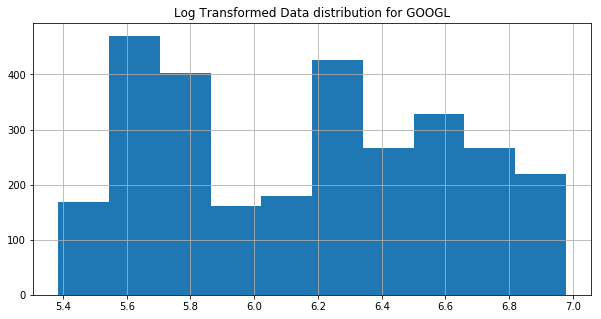

In [224]:
#transforming the data and checking for the Stationarity (aapl data used)
aapl_log = np.log(data[symbol])
aapl_log.hist()
plt.title('Log Transformed Data distribution for ' + symbol)
plt.show()

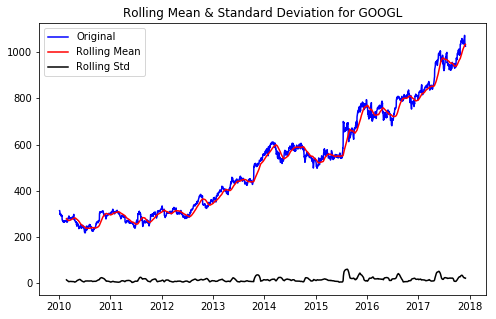

In [225]:
#Calculating rolling statistics to check for a trend/seasonality
for symbol in data:
    rolling_mean = data[symbol].rolling(window=50,center=False).mean()
    rolling_std = data[symbol].rolling(window=50,center=False).std()

    #Plot rolling statistics:
    fig, ax = plt.subplots(figsize=(8,5))
    orig = plt.plot(data[symbol], color='blue',label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.title('Rolling Mean & Standard Deviation for ' + symbol)
    plt.show(block=False)

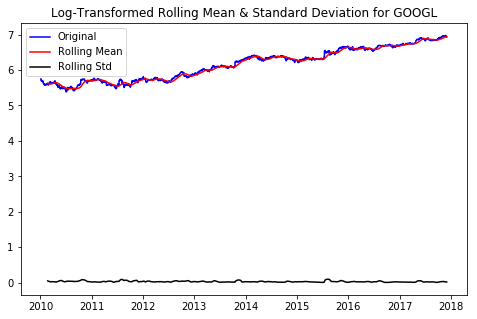

In [226]:
rolling_mean_log = aapl_log.rolling(window=50,center=False).mean()
rolling_std_log = aapl_log.rolling(window=50,center=False).std()
    
#Plot rolling statistics:
fig, ax = plt.subplots(figsize=(8,5))
orig = plt.plot(aapl_log, color='blue',label='Log-Transformed Data')
mean = plt.plot(rolling_mean_log, color='red', label='Log-Transformed Rolling Mean')
std = plt.plot(rolling_std_log, color='black', label = 'Log-Transformed Rolling Std')

plt.legend(by_label.values(), by_label.keys())

# plt.legend(loc='best')
plt.title('Log-Transformed Rolling Mean & Standard Deviation for ' + symbol)
plt.show(block=False)

### Facebook Prophet

In [185]:
dataProphet = df
dataProphet = dataProphet.reset_index()

dataProphetRed = dataProphet[['Date', 'Close']]

In [186]:
dataProphetRed = dataProphetRed.rename(columns={"Date": "ds", "Close": "y"})

In [187]:
dataProphetRed.head(5)

,ds,y
0,2017-12-03,30.572857
1,2017-12-03,30.625713
2,2017-12-03,30.138571
3,2017-12-03,30.082857
4,2017-12-03,30.282858


In [190]:
# dataProphetRed['y_orig'] = dataProphetRed['y_orig'].replace(0.0, 1.0)
dataProphetRed['y_orig'] = dataProphetRed['y'] # to save a copy of the original data

In [191]:
#log transform y
dataProphetRed['y'] = dataProphetRed['y'] #np.log(dataProphetRed['y']).replace("NaN", np.log(1.0))

In [192]:
dataProphetRed.head(5)

,ds,y,y_orig
0,2017-12-03,30.572857,30.572857
1,2017-12-03,30.625713,30.625713
2,2017-12-03,30.138571,30.138571
3,2017-12-03,30.082857,30.082857
4,2017-12-03,30.282858,30.282858


In [193]:
splitIndex = int(np.floor(dataProphetRed.shape[0]*0.90))
X_train_prophet, X_test_prophet = dataProphetRed[:splitIndex], dataProphetRed[splitIndex:]
print ("No. of samples in the training set: ", len(X_train_prophet))
print ("No. of samples in the test set", len(X_test_prophet))

No. of samples in the training set:  2601
No. of samples in the test set 289


In [194]:
model=Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True)
# model.fit(dataProphetRed)
model.fit(X_train_prophet)

RuntimeError: Initialization failed.

In [156]:
future_data = model.make_future_dataframe(periods=30)

In [ ]:
forecast_data = model.predict(future_data)

In [ ]:
forecast_data.head(5)

In [ ]:
test = X_test_prophet

In [ ]:
del test['y_orig']

In [ ]:
test.set_index('ds')

In [ ]:
test1 = model.predict(test)

In [ ]:
MSE = mean_squared_error(np.exp(test['y']), np.exp(test1['yhat']))
print ("Mean Squared Error: ", MSE)

In [ ]:
model.plot(forecast_data)

In [ ]:
model.plot_components(forecast_data)

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
def fbProphet(data):
    dataProphet = data
    dataProphet = dataProphet.reset_index()
    dataProphetRed = dataProphet[['Date', 'Close']]
    dataProphetRed = dataProphetRed.rename(columns={"Date": "ds", "Close": "y"})
    dataProphetRed['y_orig'] = dataProphetRed['y'] # to save a copy of the original data
    #log transform y
    dataProphetRed['y'] = np.log(dataProphetRed['y'])
    splitIndex = int(np.floor(dataProphetRed.shape[0]*0.90))
    X_train_prophet, X_test_prophet = dataProphetRed[:splitIndex], dataProphetRed[splitIndex:]
    model=Prophet(yearly_seasonality=True, daily_seasonality=True)
    # model.fit(dataProphetRed)
    model.fit(X_train_prophet)
    test = X_test_prophet
    del test['y_orig']
    test.set_index('ds')
    prediction = model.predict(test)
    MSE = mean_squared_error(np.exp(test['y']), np.exp(prediction['yhat']))
    return MSE

In [ ]:
for currency in currency_dict:
    original_data = currency_dict[currency]
    mse = fbProphet(original_data)
    print ("MSE using FB Prophet for " + currency + " :", mse)

### Long-Short Term Memory Recurrent Neural Network

In [203]:
data = df_corr['aapl']
data.to_csv('prices.csv',  sep=',',header=None, index=False)

NameError: name 'df_corr' is not defined

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #Hide messy TensorFlow warnings
warnings.filterwarnings("ignore") #Hide messy Numpy warnings

def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'rb').read()
    data = f.decode().split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print("> Compilation Time : ", time.time() - start)
    return model

def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

In [ ]:
global_start_time = time.time()
epochs = 20
seq_len = [10, 15, 50]
prediction_len = [10, 15, 50]

for l in seq_len:
    print('> Loading data... ')
#     data = currency_time_series['bitcoin'].to_csv()
    X_train, y_train, X_test, y_test = load_data('prices.csv', l, True)

    print('> Data Loaded. Compiling...')
    model = build_model([1, 50, 100, 1])

    model.fit(
        X_train,
        y_train,
        batch_size=512,
        nb_epoch=epochs,
        validation_split=0.05)
    
    predicted_sequences_multiple = predict_sequences_multiple(model, X_test, l, l)
    predicted_sequence_full = predict_sequence_full(model, X_test, l)
    predicted_point_by_point = predict_point_by_point(model, X_test) 
    
    print('Training duration (s) : ', time.time() - global_start_time)
    #     plot_results_multiple(predictions, y_test, 1)
    # MSE_bitcoin_sequences_multiple = mean_squared_error(y_test, predicted_sequences_multiple)
    MSE_bitcoin_sequence_full = mean_squared_error(y_test, predicted_sequence_full)
    MSE_bitcoin_point_by_point = mean_squared_error(y_test, predicted_point_by_point)
    # print("MSE for Bitcoin Multiple Sequence LSTM model: ", MSE_bitcoin_sequences_multiple)
    print("MSE for Bitcoin Full Sequence LSTM model: ", MSE_bitcoin_sequence_full)
    print("MSE for Bitcoin Point-by-Point LSTM model: ", MSE_bitcoin_point_by_point)

    print("Results for multiple sequence prediction")
    plot_results_multiple(predicted_sequences_multiple, y_test, l)
    print("Results for full sequence prediction")
    plot_results(predicted_sequence_full, y_test)
    print("Results for point by point prediction")
    plot_results(predicted_point_by_point, y_test)

In [ ]:
def lstm(data):
    global_start_time = time.time()
    epochs = 20
    seq_len = [10, 15, 50]
    prediction_len = [10, 15, 50]

    for l in seq_len:
        print('> Loading data... ')
        X_train, y_train, X_test, y_test = load_data(data, l, True)

        print('> Data Loaded. Compiling...')
        model = build_model([1, 50, 100, 1])

        model.fit(
            X_train,
            y_train,
            batch_size=512,
            nb_epoch=epochs,
            validation_split=0.05)

        predicted_sequences_multiple = predict_sequences_multiple(model, X_test, l, l)
        predicted_sequence_full = predict_sequence_full(model, X_test, l)
        predicted_point_by_point = predict_point_by_point(model, X_test) 

        print('Training duration (s) : ', time.time() - global_start_time)
        #     plot_results_multiple(predictions, y_test, 1)
        # MSE_bitcoin_sequences_multiple = mean_squared_error(y_test, predicted_sequences_multiple)
        MSE_bitcoin_sequence_full = mean_squared_error(y_test, predicted_sequence_full)
        MSE_bitcoin_point_by_point = mean_squared_error(y_test, predicted_point_by_point)
        return (MSE_bitcoin_sequence_full, MSE_bitcoin_point_by_point)